### Load Packages

In [433]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

### Particule Swarm Optimization Algorithm (PSO - 1D)

- $\texttt{Update\_velocity}$ function
    - $\texttt{particles}$ np array of the positions of the particles
    - $\texttt{velocity}$ np array with the velocities of each particle
    - $\texttt{pbest}$ np array with the personal best of each particle
    - $\texttt{gbest}$ float which represents the global best across particles

In [540]:
# update the velocity of the particules
def update_velocity(particles, velocity, pbest, gbest):
    
    r1 = np.random.uniform(0, 1) # choose randomly r1 between 0 and 1
    r2 = np.random.uniform(0, 1)
    inertia = w * velocity # the inertia term 
    cognitive = c1 * r1 * (pbest - particles) # the term of individual exploration
    social = c2 * r2 * (gbest - particles) # the term of global search
    new_velocity = inertia + cognitive + social # it adds up to give the new velocity 

    idx = np.where(new_velocity > vmax) # take all the velocities greater than the clamping velocity 
    new_velocity[idx] = vmax # fix the large velocities to vmax
    idx = np.where(new_velocity < -vmax) # likewise but for negative velocities
    new_velocity[idx] = -vmax

    return new_velocity




- $\texttt{update\_position}$ function

In [541]:
def update_position(particles, velocity):
    
    new_particles = particles + velocity # moving the particles
    idx = np.where(new_particles > x_sup) # take the particles that do not satisfy the constraint 
    new_particles[idx] = x_sup # block the particle at the upper-bound
    idx = np.where(new_particles < x_inf) # same for the lower bound
    new_particles[idx] = x_inf

    return new_particles 


- $\texttt{update\_best}$ function

In [542]:
def update_best(pbest, gbest, particles):
    obj = function(particles) # compute the new objectives
    if obj.min() < function(gbest): # if a new best global is reached we take it
        gbest = particles[np.argmin(obj)]

    idx = np.where(obj < function(pbest)) # we update the personal bests 
    pbest[idx] = particles[idx]
    return pbest, gbest


- $\texttt{run\_pso}$ function

In [543]:

def run_pso():

# Initialization

    particles = np.random.uniform(x_inf, x_sup, N) # take randomly N initial particles 
    velocity = np.zeros_like(particles) # set the velocities to zeo at the beginning 
    pbest = np.copy(particles) # the personal bests position are the initial positions 
    gbest = pbest[np.argmin(function(pbest))] # the global best is the minimum 
    dynamic = [np.copy(particles)] # we store the trajectory of the particles 

    for _ in range(T): # we loop T times to have a dynamic of T periods 

    
        velocity = update_velocity(particles, velocity, pbest, gbest) # compute the velocity 
        particles = update_position(particles, velocity) # new particles 
        dynamic.append(np.copy(particles)) # store the new population 
        pbest, gbest = update_best(pbest, gbest, particles) # update the best postions 

    return gbest, dynamic # return the best position and the trajectory 



### 1) Try the algorithm with a simple function
$f(x) = x^2$ on $\mathcal{I} = ]x_{inf}, x_{sup}[$

In [544]:
def function(x):
    return x**2

- Set the constants 

In [545]:
c1, c2, w, k = 1.9, 1, 0.9, 0.5 # to compute the velocity 
T = 30 # Time 
N = 20 # Number of particles 
x_inf = -5 # upper bound
x_sup = 5 # lower bound
vmax = k*(x_sup - x_inf)/2 # The clamping velocity 

- We plot the final and the initial population 

In [546]:
gbest, dynamic = run_pso() # run the algorithm 

<function matplotlib.pyplot.show(close=None, block=None)>

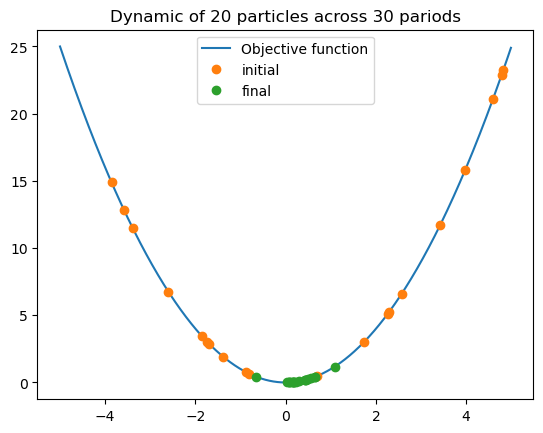

In [547]:
x1 = np.arange(x_inf, x_sup, 0.01)
plt.plot(x1, function(x1), label = 'Objective function')
plt.title('Dynamic of 20 particles across 30 pariods')
plt.plot(dynamic[0], function(dynamic[0]), marker='o', ls = '', label = 'initial')
plt.plot(dynamic[-1], function(dynamic[-1]), marker='o', ls = '', label = 'final')
plt.legend()
plt.show

### 2) We can try with trickier function

- Alpine function :  $\forall x \in \mathbb{R},\; f(x) = |x\sin(x)+0.1x|$ and $x_{min} = 0$

In [550]:
def function(x):
    return np.abs(x*np.sin(x)+0.1*x)
    

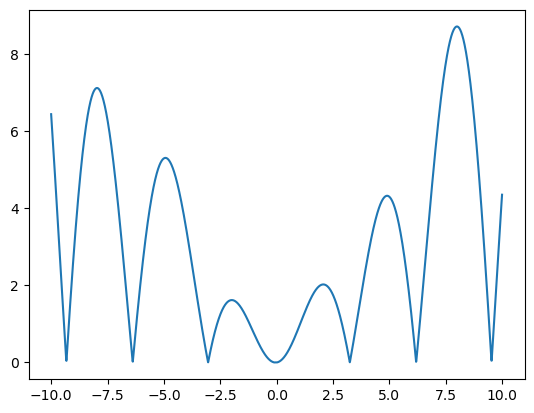

In [551]:
x1 = np.arange(-10, 10, 0.01)
plt.plot(x1, function(x1), label = 'Objective function')
plt.show()

In [552]:
gbest, dynamic = run_pso() # run the algorithm 

<function matplotlib.pyplot.show(close=None, block=None)>

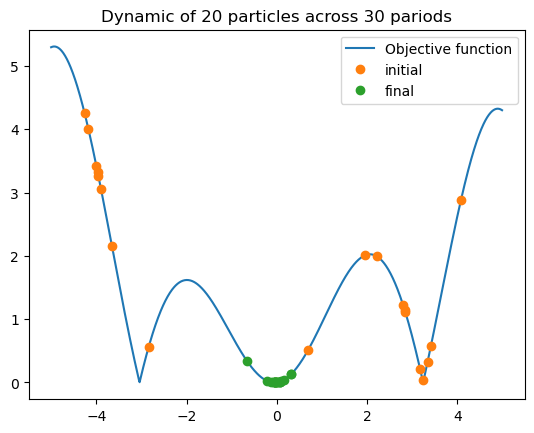

In [553]:
x1 = np.arange(x_inf, x_sup, 0.01)
plt.plot(x1, function(x1), label = 'Objective function')
plt.title('Dynamic of 20 particles across 30 pariods')
plt.plot(dynamic[0], function(dynamic[0]), marker='o', ls = '', label = 'initial')
plt.plot(dynamic[-1], function(dynamic[-1]), marker='o', ls = '', label = 'final')
plt.legend()
plt.show